# Construcción de la Transformada de Fourier de Tiempo Continuo a partir de la Serie de Fourier
Este Notebook parte de la definición de la Serie de Fourier de tiempo continuo de la onda cuadrada y construye la Transformada de Fourier del pulso por el procedimiento de hacer tender el  período  a infinito. La generalización de este ejemplo lleva a la definición de la Transformada de Fourier.

Ya trabajamos con la Serie de Fourier de tiempo continuo, la cual requiere la hipótesis de periodicidad en el tiempo de la señal. Esta hipótesis es muy restrictiva  para las señales con las que queremos trabajar en ingeniería eléctrica, por que que la intentaremos levantar. Con las Series de Fourier transformamos la señal $x(t)$ en una señal $a[k]=a_k$ de variable discreta, donde la variable $k$ está relacionada con la frecuencia, de tal modo que  si $a_k$ es grande entonces $x(t)$ tiene una componente significativa en esa frecuencia.  Conservaremos esta intuición al construir la Transformada de Fourier según el ejemplo a continuación. 

Consideremos una señal periódica onda cuadrada de período $T$  y ancho $2t_0<T$, es decir que vale   $x(t)=1$ para $ t \in[-t_0,t_0],$ y $x(t)=0$ para $t\in[-T/2,T/2]$, repitiendose periódicamente con  período $T$. El siguiente ejemplo grafica esta señal con $t_0=2.5$ y $T=10.$ 


In [2]:
# Señales y Sistemas, 2019. IIE-FIng-Udelar.
# @author: Juan Bazerque

import warnings
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy as sp

plt.rcParams["figure.figsize"] = (20, 10)

warnings.filterwarnings("ignore")

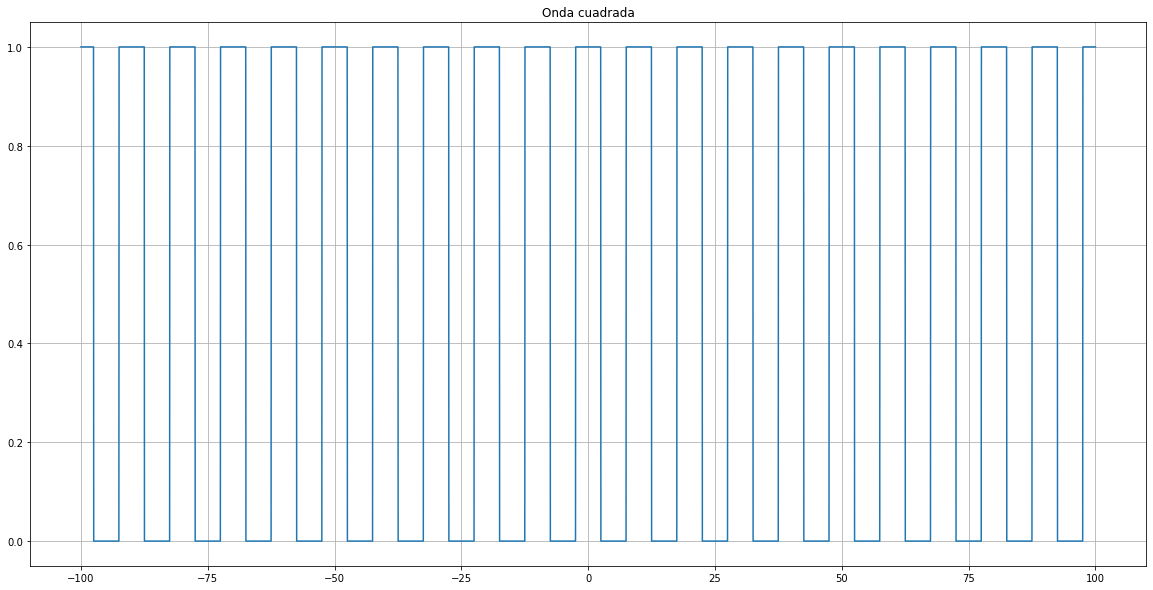

In [3]:
# =============================================================================
# Onda cuadrada de ancho t_0 y período T
# =============================================================================
def ondaCuadrada(t, T, t0):
    return 0.5 * (signal.square(2 * np.pi * 1 / T * (t + t0), 2 * t0 / T) + 1)


t = np.linspace(-100, 100, 5000)
T = 10
t0 = 2.5

x = ondaCuadrada(t, T, t0)
fig, ax = plt.subplots()
plt.plot(t, x)
plt.title("Onda cuadrada")
# plt.ylim(-2, 2)
plt.grid()
# ax.set_aspect(8.0)

## Coeficientes de la Serie de Fourier

La Serie de Fourier de esta señal cuadrada tiene coeficientes $$a_0=\frac{1}{T}\int_{-T/2}^{T/2} x(t)dt=\frac{1}{T}\int_{-t_0}^{t_0} dt=2t_0/T$$ y

$$a_k=\frac{1}{T}\int_{-T/2}^{T/2} x(t) e^{-j\omega_k t}dt =\frac{1}{T}\int_{-t_0}^{t_0} e^{-j\omega_k t}dt=\frac{2}{T\omega_k}\sin(\omega_k t_0), \quad \omega_k=\frac{2\pi}{T}k. $$

En la siguiente figura se muestra nuevamente la onda cuadarada para $T=10$ y $t_0=3$, junto a la serie $a_k$, y una tercera gráfica que se explica a continuación. 

Para lo que sigue, es conveniente graficar los coeficientes $a_k$ multiplicados por el período $T$, y colocarlos sobre los valores  $\omega_k$ como indica la tercera gráfica, por ejemplo, en cero colocamos $T a_0= 2t_0$ , luego en $\omega_1=\frac{2\pi}{T}$ colocamos $T a_1= \frac{2}{\omega_1} \sin(\omega_1 t_0)$, y así sucesivamente

$$\hspace{5cm} T a_k= \frac{2}{\omega_k} \sin(\omega_k t_0)\hspace{5cm} (1)$$

Además de los puntos azules, que representan $T a_k$, se muestra en rojo la función envolvente de variable continua  

$$\hspace{5cm} X(j\omega ):=\frac{2}{\omega}\sin(\omega t_0),\hspace{5cm} (2)$$ 

que se obtiene al considerar una  variable continua $\omega$ substituyendo $\omega_k$ en la ecuación (1) . Véase que  $X(j\omega)$ está definida como la función que  pasa por los puntos $T a_k$, lo que escribimos como $Ta_k=X(j\omega_k)$. Decimos entonces que $Ta_k$ son muestras de $X(j\omega)$ en los puntos      $\omega=\omega_k$.

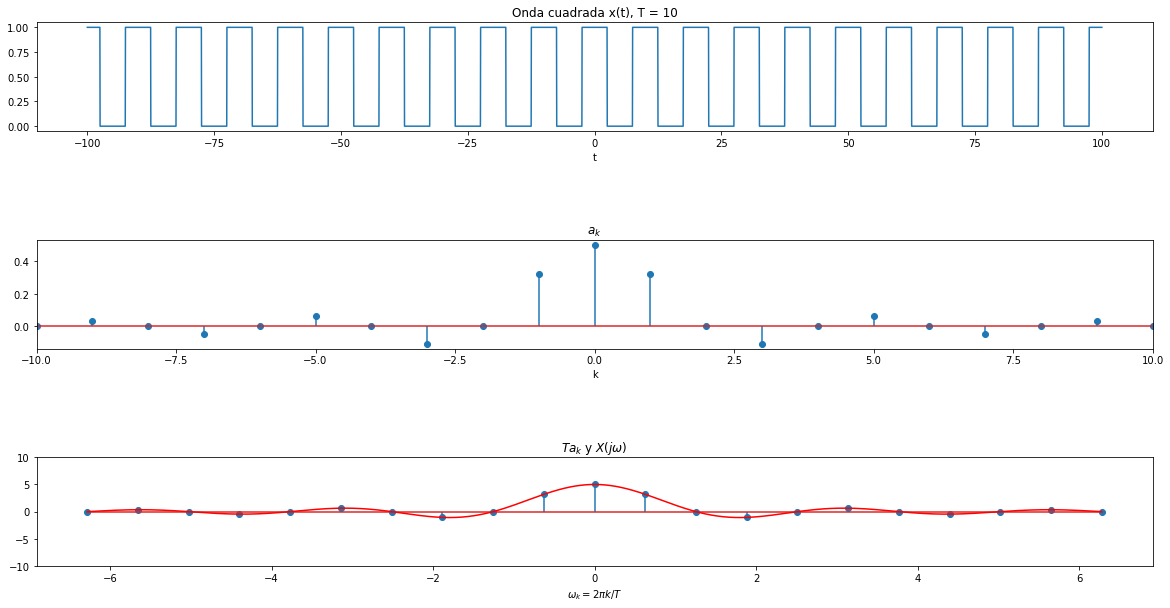

In [4]:
# =============================================================================
# Coeficientes de la SdeF de la onda cuadrada y su envolvente
# =============================================================================
# La siguiente función grafica la  onda  cuadrada, y  sus coeficientes a[k]
# También grafica T a[k] en funcción de omega_k = 2pi/T k


def transformadaFourierOndaCuadrada(t, T, t0):
    x = ondaCuadrada(t, T, t0)
    k = np.linspace(-T, T, 2 * T + 1)
    wk = 2 * np.pi * k / T
    # wk[T] = 1 #just to avoid not  a number
    Tak = 2 * np.sin(wk * t0) / wk
    Tak[T] = 2 * t0
    w = np.linspace(-2 * np.pi, 2 * np.pi, 1001)
    Xjw = 2 * np.sin(w * t0) / w
    Xjw[500] = 2 * t0

    # primero la onda como función del tiempo t continuo
    plt.subplot(3, 1, 1)
    plt.plot(t, x)
    plt.title("Onda cuadrada x(t), T = %d" % (T))
    #     plt.ylim(-2, 2)
    plt.xlabel("t")

    # Luego la secuencia a[k] enfunción de la variable discreta k
    plt.subplot(3, 1, 2)
    plt.stem(k, Tak / T)
    plt.title("$a_k$")
    plt.xlim(-10, 10)
    plt.xlabel("k")

    # Por último Ta[k] sobre los valores omega_k junto a su envolvente X(jomega)
    plt.subplot(3, 1, 3)
    plt.stem(wk, Tak)
    plt.title("$T a_k$ y $X(j\omega)$")
    plt.ylim(-10, 10)
    plt.plot(w, Xjw, "r")
    plt.xlabel("$\omega_k=2\pi k/T$")
    plt.subplots_adjust(hspace=1)

    plt.show()


N = 1
transformadaFourierOndaCuadrada(t, N * T, t0)

## Efecto al agrandar el período $T$

La primera pregunta que queremos responder es ¿qué sucede si agrandamos el período $T$ dejando fijo el ancho $t_0$?

Tenemos las siguientes cinco respuestas a esa pregunta que se ilustran en la figura de más abajo.


1. Los pulsos se separan entre sí.

2. Los coeficientes de la  Serie de Fourier cambian pues la señal es otra.

3. Las frecuencias $\omega_k$ se acercan entre sí, por ejemplo para $T$ la separación entre dos frecuencias consecutivas es

$$\Delta \omega_k:=  \omega_{k+1}- \omega_{k}=\frac{2\pi (k+1)}{ T} -\frac{2\pi k}{ T}=\frac{2\pi }{ T}$$

y análogamente para $\tilde T=2T$ 

$$\Delta \tilde\omega_k:= \tilde \omega_{k+1}-\tilde \omega_{k}=\frac{2\pi (k+1)}{\tilde T} -\frac{2\pi k}{\tilde T}=\frac{2\pi }{\tilde T}$$

Entonces, dado que $\tilde T=2T$, resulta $\Delta \tilde\omega_k =\frac{1}{2}\Delta \omega_k.$ 

4. La  envolvente $X(j\omega)$ es una  función de $\omega\in\mathbb R$ por lo que no cambia al variar $T$.

5. Dado que la relación entre las ecuaciones (1) y (2) se estableció para un valor de $T$ genérico, entonces sigue valiendo para los nuevos valores de $T$, $a_k$ y $\omega_k$, que $T a_k = X(j\omega_k)$ ($T a_k$ siguen siendo muestras de $X(j\omega)$ en $\omega_k$). Entonces si repetimos las gráficas de arriba   para un nuevo valor $T=20$, los puntos azules   $T a_k$ volverán a caer sobre la línea roja $X(j\omega)$. 


Comprobamos estos cinco puntos en las siguientes gráficas, correspondientes al nuevo $T=20$, con $t_0=3$ sin cambiar.

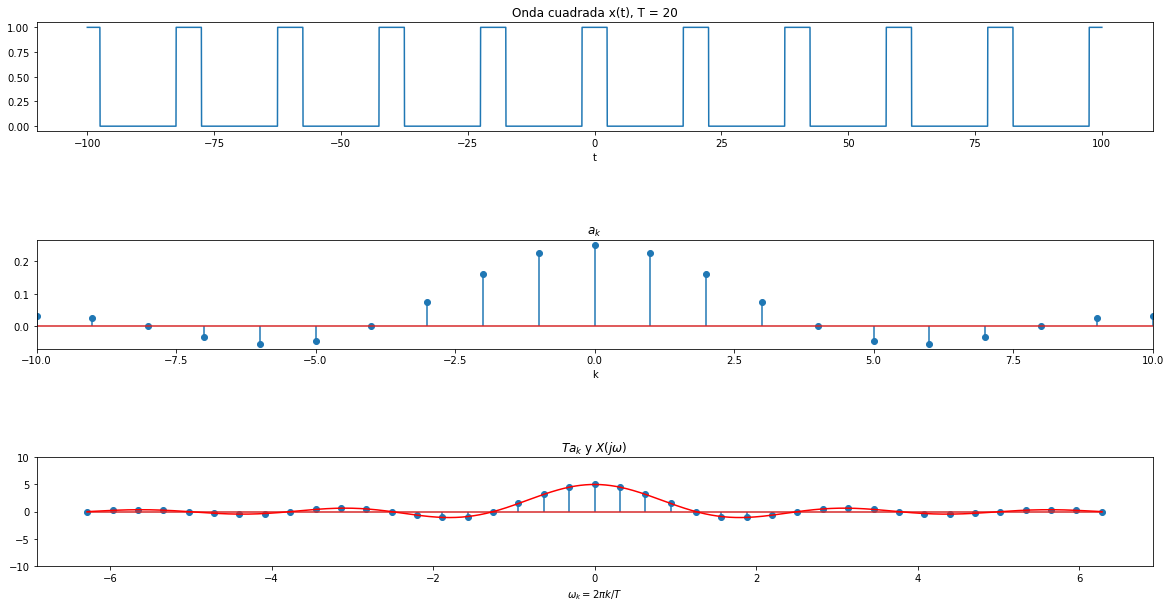

In [5]:
T = 20
transformadaFourierOndaCuadrada(t, T, t0)

En efecto se puede observar en las figuras anteriores, que al pasar de $T=10$ a $T=20$ los pulsos se separaron, y los coeficientes $a_k$ cambiaron.  Además la envolvente roja no cambia, y al graficar $T a_k$ sobre las  frecuencias $\omega_k$, que aparecen ahora más juntas  entre si,  los puntos azules  vuelven a coincidir con la envolvente. 

Repitamos para $T=50$ y $T=100$. 

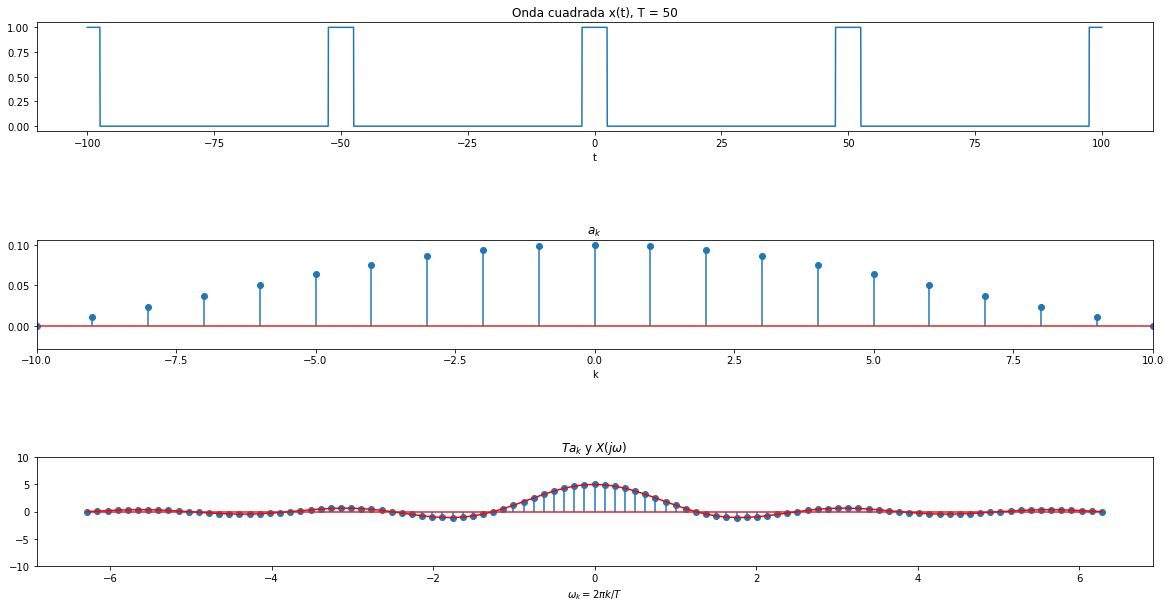

In [6]:
T = 50
transformadaFourierOndaCuadrada(t, T, t0)

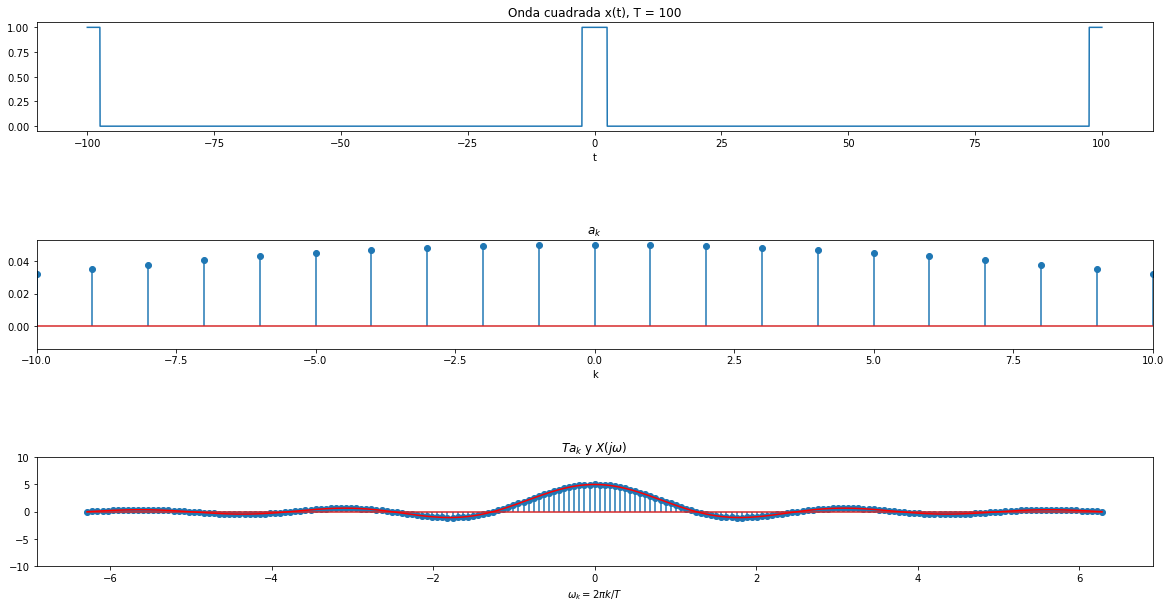

In [7]:
T = 100
transformadaFourierOndaCuadrada(t, T, t0)

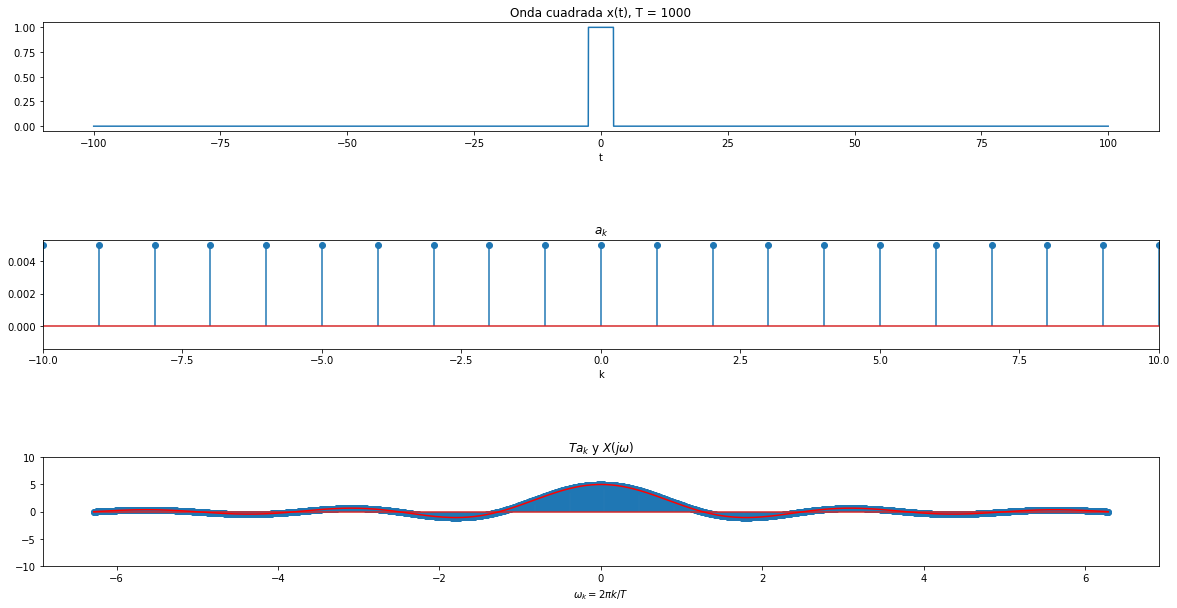

In [8]:
T = 1000
transformadaFourierOndaCuadrada(t, T, t0)

## Hacia un modelo para señales no periódicas

La segunda pregunta que nos podemos hacer es ¿qué sucede si hago crecer $T$ hacia infinito?

Las respuestas a esta pregunta se deducen de las respuestas a la pregunta anterior, y se intuyen de la sequencia de gráficas para $T=10, 20,50,100$

1. Solo queda el pulso centrado en $0$, que es una señal no periodica definida por $x(t)=1$ para $|t|\leq t_0$ y $x(t)=0$ para $|t|> t_0$.

2. Las distancia entre sucesivas frecuencias armónicas  $\omega_k$  tiende a cero, formando un conjunto denso que aproxima al conjunto de valores continuo $\omega\in \mathbb R$.

3. Correspondientemente, las muestras $T a_k =X(j\omega _k)$  se juntan entre sí pasando a  coincidir con la señal de variable continua $X(j\omega)$ representada como la envolvente roja que se muestra  en todas las  figuras.

## Definición de la transformada de Fourier

Del análisis anterior surge naturalmente partir de una señal no periódica $x(t)$ (pulso de ancho $t_0$), y construir una señal periódica  $x_T(t)$ (onda  cuadrada) repitiendo x(t) en cada período $T$, para  luego construir la Transformada de Fourier $X(j\omega )$ como el límite cuando  $T\to\infty$ de $T a_k$, donde $a_k$ son los coeficientes de $x_T(t)$. Para obtener $X(j\omega)$ en un valor de $\omega$ dado, hacemos $k$ tender a infinito como función de $T$  de modo que $\omega_k=\frac{2\pi k}{T}\to \omega$. Además usamos que por  definición  $x_T(t)$ y $x(t)$ coinciden en el primer período, entonces escribimos 

$$X(j\omega) := \lim_{T\to \infty} T a_k =\lim_{T\to \infty}\frac{T}{T} \int_{-T/2}^{T/2}x(t)e^{-j\omega_k t}dt=\int_{-\infty}^{\infty}x(t)e^{-j\omega t}dt$$


Según la construcción que hicimos, esta definición corresponde a la ecuación de análisis  de las series de Fourier, que se usa para obtener el coeficiente $a_k$ a partir de $x_T(t)$. 

La ecuación de  síntesis $$x(t)= \sum_k a_k e^{j\omega_k t}$$ también tiene su correspondiente para señales no periódicas. Recordando que $Ta_k=X(j\omega_k)$ y que $\Delta \omega_k =\omega_{k+1}-\omega_k=2\pi/T$, lo que implica que $\frac{1}{T}=\Delta \omega_k /2\pi $ escribimos 

$$x_T(t)= \sum_{k=-\infty}^\infty a_k  e^{j\omega_k t}=\frac{1}{T} \sum_{k=-\infty}^\infty T a_k  e^{j\omega_k t} =\frac{1}{T} \sum_{k=-\infty}^\infty X(j\omega_k)   e^{j\omega_k t} =  \frac{1}{2\pi} \sum_{k=-\infty}^\infty X(j\omega_k)   e^{j\omega_k t} \Delta \omega_k.$$

Luego, la suma se convierte en integral al pasar al límite,  dado que dado que $\Delta \omega_k =2\pi/T\to 0$ cuando $T\infty$, y como $x_T(t)\to x(t)$ (los pulsos contiguos desaparecen), entonces

$${x(t)=\lim_{T\to \infty} \frac{1}{2\pi} \sum_{k=-\infty}^\infty X(j\omega_k)   e^{j\omega_k t} \Delta \omega_k  = \frac{1}{2\pi}\int_{-\infty}^{\infty} X(j\omega)e^{j\omega t} d\omega}$$


Finalmente se define la transformada de Fourier de $x(t)$ como

$$\boxed{ X(j\omega)=\int_{-\infty}^{\infty}x(t)e^{-j\omega t}dt} \quad (3)$$

y  su antitransformada como

$$\boxed{ x(t)=\frac{1}{2\pi}\int_{-\infty}^{\infty}X(j\omega)e^{j\omega t}d\omega}\quad (4)$$

Si bien partiremos  de estas  ecuaciones (3) y (4)  como definición de la Transformada de Fourier y su antitransformada de aquí en más, la construcción anterior es  importante porque permite vincularlas con las ecuaciones de análisis y síntesis de las Series de Fourier, y traer de allí toda la intuición acerca de las componentes en frecuencia y respuesta a exponenciales de SLITs.

Para la existencia de $X(j\omega)$ es suficiente con que $x(t)$ sea módulo integrable, es decir que $\int_{-\infty }^\infty |x(t)|dt<\infty$. Sin embargo para que la antitransformada de $X(j\omega)$ en la ecuación (4) coincida efectivamente con $x(t)$ se requieren las mismas hipótesis de Dirichlet que para las Series de Fourier. Se obtienen las mismas  garantías, en cuanto a que la antitransformada coincide con $x(t)$ en casi todo punto, salvo en los puntos de discontinuidad de $x(t)$ donde (4) no es válida.   



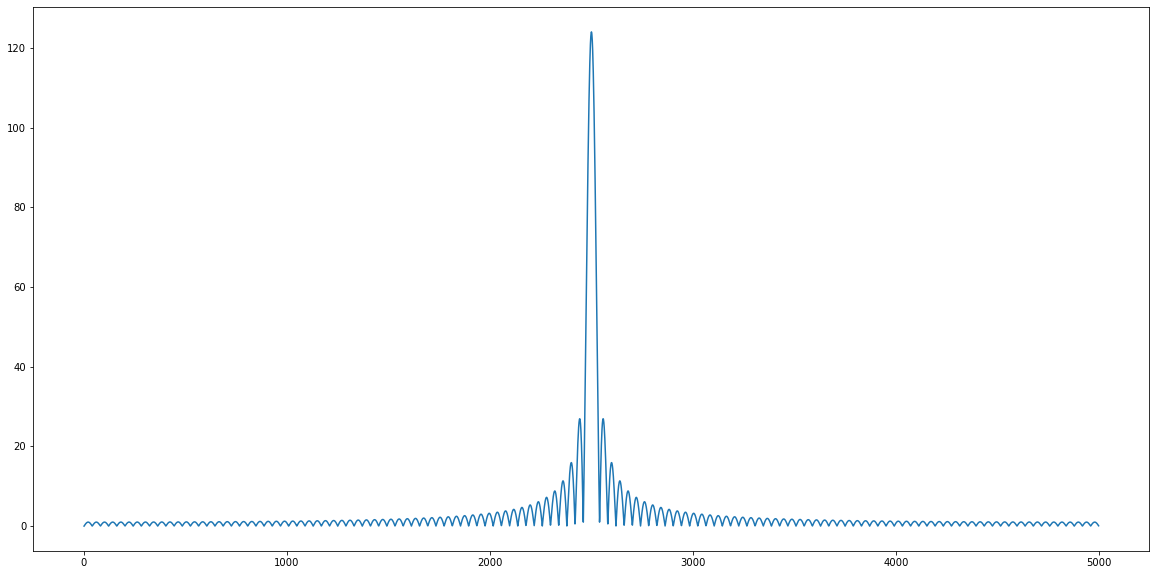

In [9]:
T = 1000
x = ondaCuadrada(t, T, t0)
X = sp.fft.fftshift(sp.fft.fft(x))
plt.plot(abs(X))

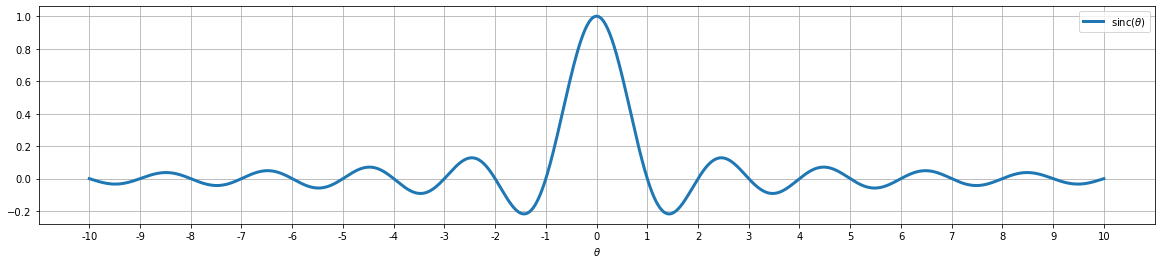

In [11]:
N = 10
theta = np.linspace(-N, N, 1000)
x = np.sinc(theta)
fig, ax = plt.subplots(figsize=(20, 4))
plt.plot(theta, x, label='sinc($\\theta$)', linewidth=3)
ticks = np.arange(-N, N + 1, 1)
plt.xlabel('$\\theta$')
ax.xaxis.set_ticks(ticks)
ax.xaxis.set_major_formatter('{x:d}')
plt.legend()
plt.grid()